# **BDM-3035 Big Data Capstone Project**
Instructor: Meysam Effati

Members:


*   Ann Margaret Silva (C0903604)
*   Antonio Carlos De Mello Mendes (C0866063)

*   Maria Jessa Cruz (C0910329)
*   Prescila Mora (C0896891)


*   Rewant Sharma (C0894265)



Datasets:

*https://cwfis.cfs.nrcan.gc.ca/background/summary/fwi*

*https://cwfis.cfs.nrcan.gc.ca/background/summary/fbp*


# **Wildfire Prediction Data**

each column name in the GeoDataFrame based on the information provided:

**_id:** Unique identifier for each record in the dataset.

**lat:** Latitude of the fire location.

**lon:** Longitude of the fire location.

**rep_date:** The reported date of the fire.

**source:** Source of the data for the fire event.

**sensor:** The type of sensor used to detect the fire.

**satellite:** The name of the satellite that detected the fire.

**agency:** The agency reporting the fire, such as provincial, territorial, or Parks Canada.

**temp:** Temperature at the fire location.

**rh:** Relative humidity at the fire location.

**ws:** Wind speed at the fire location.

**wd:** Wind direction at the fire location.

**pcp:** Precipitation at the fire location.

**ffmc:** Fine Fuel Moisture Code, part of the Canadian Forest Fire Weather Index (FWI) System, indicating the moisture content of surface litter and other cured fine fuels.

**dmc:** Duff Moisture Code, part of the FWI System, representing the average moisture content of loosely compacted organic layers of moderate depth.

**dc:** Drought Code, part of the FWI System, indicating the moisture content of deep, compact organic layers.

**isi:** Initial Spread Index, part of the FWI System, indicating the rate of spread based on the FFMC and wind speed.

**bui:** Buildup Index, part of the FWI System, combining the DMC and DC to indicate the total amount of fuel available for combustion.

**fwi**: Fire Weather Index, a comprehensive rating of fire intensity.
**fuel:** Type of fuel present at the fire location.

**ros:** Rate of spread of the fire.

**sfc:** Surface fuel consumption, representing the amount of fuel consumed at the surface level.

**tfc**: Total fuel consumption, representing the total amount of fuel consumed during the fire.

**bfc**: Below-ground fuel consumption, representing the amount of fuel consumed below ground level.

**hfi**: Head fire intensity, indicating the intensity of the leading edge of the fire.

**cfb**: Crown fraction burned, indicating the proportion of the crown area burned.

**pcuring**: Percent curing, indicating the proportion of dead material in grass fuels.

**greenup**: The state of vegetation green-up, indicating how much the vegetation has recovered or greened up.

**elev**: Elevation of the fire location.

**sfl**: Surface fireline intensity, indicating the intensity of the fire along the surface.

**cfl**: Crown fireline intensity, indicating the intensity of the fire in the crown of trees.

**tfc0**: Initial total fuel consumption, representing the amount of fuel initially consumed during the fire.

**ecozone**: Ecozone of the fire location, providing information about the ecological zone.

**sfc0**: Initial surface fuel consumption, representing the initial amount of surface fuel consumed.

**cbh**: Canopy base height, indicating the height above ground level where the canopy begins.

These columns represent various attributes related to fire incidents, fire weather, fuel conditions, and fire behavior as collected by Canadian fire management agencies and other sources.

### Feature Engineering ###

Handling Missing Values

In [170]:
import sys
import os
import re
from dotenv import load_dotenv
import pandas as pd
import geopandas as gpd
import numpy as np
import geopandas as gpd
from pymongo import MongoClient
from pymongo.errors import ConnectionFailure
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [171]:
# Add the 'scripts' directory to the Python path
sys.path.append(os.path.abspath(os.path.join('scripts')))

In [177]:
# Import the db_utils functions
import extract_to_mongodb as etm
import db_utils as dbu

In [179]:
# Define the collection name
collection_name = 'wildFire_Collection_clean_Address'

In [172]:
# Load the data from MongoDB
gdf = dbu.load_data_from_mongodb(collection_name)

INFO:pymongo.client:You appear to be connected to a CosmosDB cluster. For more information regarding feature compatibility and support please visit https://www.mongodb.com/supportability/cosmosdb


In [173]:
# Display the first few rows of the GeoDataFrame
print("First few rows of the loaded GeoDataFrame:")
print(gdf.head())

First few rows of the loaded GeoDataFrame:
                        _id        lat         lon    rep_date source  \
0  666a3c628ccb08eec3af76dc  67.228996 -138.828995  2021-07-20   USFS   
1  666a3c628ccb08eec3af76dd  66.803001 -137.238998  2021-07-20   USFS   
2  6669e2f444a41007063cc7e4  49.826000 -107.129000  2020-04-25   NASA   
3  666a1b048ccb08eec3aec561  51.477001  -94.732002  2021-07-12   USFS   
4  666a1b048ccb08eec3aec562  52.009670  -93.233368  2021-07-12  NASA2   

    sensor satellite agency       temp  rh  ...  tfc0  ecozone  sfc0  \
0    MODIS      Aqua     YT  25.218000  28  ...  2.40       11  2.20   
1    MODIS      Aqua     YT  25.049999  32  ...  2.24       11  1.49   
2    MODIS      Aqua     SK  14.874000  24  ...  0.35       10  0.35   
3  VIIRS-I     S-NPP     ON  29.694000  39  ...  4.68       6a  3.89   
4  VIIRS-I     S-NPP     ON  30.134001  37  ...  2.05       6a  1.44   

                     geometry  country  municipality  postalCode  \
0     POINT (-138

In [175]:
# Check the shape of the GeoDataFrame
print("\nShape of the GeoDataFrame:")
print(gdf.shape)


Shape of the GeoDataFrame:
(206765, 41)


In [174]:
# Check for missing values
missing_values = gdf.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
_id                       0
lat                       0
lon                       0
rep_date                  0
source                    0
sensor                    0
satellite               211
agency                    0
temp                      0
rh                        0
ws                        0
wd                        0
pcp                       0
ffmc                      0
dmc                       0
dc                        0
isi                       0
bui                       0
fwi                       0
fuel                      0
ros                       0
sfc                       0
tfc                       0
bfc                  101679
hfi                       0
cfb                       0
pcuring               22323
greenup               22323
elev                      0
sfl                       0
cfl                       0
tfc0                      0
ecozone                  33
sfc0                      0
geometry         

In [181]:
# Identify columns with missing values
columns_with_missing_values = missing_values[missing_values > 0]
print("\nColumns with missing values:")
print(columns_with_missing_values)


Columns with missing values:
satellite        211
bfc           101679
pcuring        22323
greenup        22323
ecozone           33
postalCode    108224
dtype: int64


In [176]:
# Check for rows with any missing values
rows_with_missing_values = gdf.isnull().any(axis=1)
num_rows_with_missing_values = rows_with_missing_values.sum()
print(f"\nNumber of rows with missing values: {num_rows_with_missing_values}")


Number of rows with missing values: 151942


In [182]:
# Show the details of rows with missing values
print("\nDetails of rows with missing values:")
print(gdf[rows_with_missing_values])


Details of rows with missing values:


                             _id        lat         lon   rep_date source  \
0       666a3c628ccb08eec3af76dc  67.228996 -138.828995 2021-07-20   USFS   
1       666a3c628ccb08eec3af76dd  66.803001 -137.238998 2021-07-20   USFS   
3       666a1b048ccb08eec3aec561  51.477001  -94.732002 2021-07-12   USFS   
5       666a1b048ccb08eec3aec564  51.382000  -94.242996 2021-07-12   USFS   
6       666a3c628ccb08eec3af76de  64.093002 -133.016998 2021-07-20   USFS   
...                          ...        ...         ...        ...    ...   
206760  6670cecea6dc531d5ed0dda4  58.470390 -114.456284 2023-05-04  NASA2   
206761  6670cecea6dc531d5ed0dda5  58.471321 -114.463013 2023-05-04  NASA2   
206762  6670cecfa6dc531d5ed0dda6  58.474621 -114.461357 2023-05-04  NASA2   
206763  6670cecfa6dc531d5ed0dda7  58.475540 -114.468071 2023-05-04  NASA2   
206764  6670cf23a6dc531d5ed0df0d  56.296711 -111.106720 2023-01-20  NASA2   

         sensor satellite agency       temp  rh  ...  tfc0  ecozone  sfc0  

In [180]:
# Show details of the rows with missing values for each column
for column in columns_with_missing_values.index:
    print(f"\nDetails of missing values in column '{column}':")
    missing_details = gdf[gdf[column].isnull()]
    print(missing_details)


Details of missing values in column 'satellite':
                             _id        lat         lon   rep_date source  \
51049   666a6743a1f73f51bed3abbf  65.193016 -119.207169 2022-07-05   NOAA   
51089   666a6745a1f73f51bed3abc8  65.173210 -119.152298 2022-07-05   NOAA   
51109   666a6745a1f73f51bed3abcc  65.180794 -119.161316 2022-07-05   NOAA   
51111   666a6746a1f73f51bed3abce  63.759419 -121.289146 2022-07-05   NOAA   
51115   666a6746a1f73f51bed3abd1  63.652706 -114.923599 2022-07-05   NOAA   
...                          ...        ...         ...        ...    ...   
199724  666a8daca1f73f51bed48169  65.198738 -119.024559 2022-07-05   NOAA   
199766  666a8db5a1f73f51bed48198  66.565506 -138.994339 2022-07-05   NOAA   
199900  666a8dcea1f73f51bed48225  66.570412 -139.018448 2022-07-05   NOAA   
200106  666a8df5a1f73f51bed482fd  66.575333 -139.042664 2022-07-05   NOAA   
200302  666a8e20a1f73f51bed483ed  66.678398 -139.501953 2022-07-05   NOAA   

       sensor satellite a

                             _id        lat         lon   rep_date source  \
74      6670af91a6dc531d5ed058dc  53.256458 -115.920731 2023-05-05  NASA3   
109     6670d894a6dc531d5ed10751  53.407120 -116.407257 2023-05-06  NASA2   
125     6670d895a6dc531d5ed10752  53.396530 -116.164810 2023-05-06  NASA2   
281     6670d895a6dc531d5ed10753  53.404541 -116.291687 2023-05-06  NASA2   
306     6670d895a6dc531d5ed10754  53.405010 -116.299133 2023-05-06  NASA2   
...                          ...        ...         ...        ...    ...   
206760  6670cecea6dc531d5ed0dda4  58.470390 -114.456284 2023-05-04  NASA2   
206761  6670cecea6dc531d5ed0dda5  58.471321 -114.463013 2023-05-04  NASA2   
206762  6670cecfa6dc531d5ed0dda6  58.474621 -114.461357 2023-05-04  NASA2   
206763  6670cecfa6dc531d5ed0dda7  58.475540 -114.468071 2023-05-04  NASA2   
206764  6670cf23a6dc531d5ed0df0d  56.296711 -111.106720 2023-01-20  NASA2   

         sensor satellite agency       temp  rh  ...  tfc0  ecozone  sfc0  

In [178]:
# Convert rep_date to datetime
gdf['rep_date'] = pd.to_datetime(gdf['rep_date'])

In [203]:
gdf['rep_date']

0        2021-07-20
1        2021-07-20
2        2020-04-25
3        2021-07-12
4        2021-07-12
            ...    
206760   2023-05-04
206761   2023-05-04
206762   2023-05-04
206763   2023-05-04
206764   2023-01-20
Name: rep_date, Length: 206765, dtype: datetime64[ns]

In [200]:
# Get the overall range of dates
min_date = gdf['rep_date'].min()
max_date = gdf['rep_date'].max()

print(f"The date range in the dataset is from {min_date} to {max_date}.")

The date range in the dataset is from 2020-03-20 00:00:00 to 2023-09-04 00:00:00.


In [183]:
# Check the date ranges for each locality
date_ranges = gdf.groupby('locality').agg(start_date=('rep_date', 'min'), end_date=('rep_date', 'max'))
date_ranges

,start_date,end_date
locality,,
100 Mile House,2021-01-09,2021-07-31
70 Mile House,2021-07-01,2023-04-30
Abbotsford,2020-04-09,2021-09-01
Aberdeen,2020-05-28,2020-05-28
Abernethy,2020-05-30,2020-05-30
...,...,...
Zama City,2022-05-31,2022-09-24
Zealandia,2020-05-19,2021-10-15
Zehner,2020-05-03,2020-05-04


The date ranges for each locality vary significantly. Some localities have data spanning several years, while others only have data for specific days or short periods.

In [184]:
# Determine the number of days between the earliest and latest report dates for each locality.
# Calculate date range in days for each locality
gdf['rep_date'] = pd.to_datetime(gdf['rep_date'])
date_ranges = gdf.groupby('locality')['rep_date'].agg(['min', 'max'])
date_ranges['date_range_days'] = (date_ranges['max'] - date_ranges['min']).dt.days

In [198]:
# Set a threshold for minimum days to apply expand and fill
threshold_days = 30
valid_localities = date_ranges[date_ranges['date_range_days'] >= threshold_days]

In [188]:
# Filter original dataframe to include only valid localities
filtered_gdf = gdf[gdf['locality'].isin(valid_localities.index)]

In [185]:
# Define the expand and fill function
def expand_and_fill(group):
    full_range = pd.date_range(start=group['rep_date'].min(), end=group['rep_date'].max(), freq='D')
    full_df = pd.DataFrame(full_range, columns=['rep_date'])
    merged_group = pd.merge(full_df, group, on='rep_date', how='left')
    merged_group[['locality', 'ffmc', 'dmc', 'dc', 'isi', 'bui', 'fwi']] = merged_group[['locality', 'ffmc', 'dmc', 'dc', 'isi', 'bui', 'fwi']].ffill()
    return merged_group

In [186]:
# Apply the function to valid localities
expanded_gdf = filtered_gdf.groupby('locality').apply(expand_and_fill).reset_index(drop=True)

/tmp/ipykernel_1976/1341109144.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  expanded_gdf = filtered_gdf.groupby('locality').apply(expand_and_fill).reset_index(drop=True)


In [187]:
# List of continuous variables
continuous_vars = ['temp', 'rh', 'ws', 'wd', 'pcp', 'ffmc', 'dmc', 'dc', 'isi', 'bui', 'fwi', 'fuel', 'ros', 'sfc', 'tfc', 'bfc', 'hfi', 'cfb', 'pcuring', 'greenup', 'elev', 'sfl', 'cfl', 'tfc0', 'sfc0']

# Checking missing values for continuous variables
missing_values = expanded_gdf[continuous_vars].isnull().sum()
print(missing_values)

temp       462892
rh         462892
ws         462892
wd         462892
pcp        462892
ffmc            0
dmc             0
dc              0
isi             0
bui             0
fwi             0
fuel       462892
ros        462892
sfc        462892
tfc        462892
bfc        562192
hfi        462892
cfb        462892
pcuring    483923
greenup    483923
elev       462892
sfl        462892
cfl        462892
tfc0       462892
sfc0       462892
dtype: int64


In [191]:
# List of variables to impute using ffill and bfill
variables_to_impute = ['temp', 'rh', 'ws', 'wd', 'pcp', 'fuel', 'ros', 'sfc', 'tfc', 'bfc', 'hfi', 'cfb', 'pcuring', 'greenup', 'elev', 'sfl', 'cfl', 'tfc0', 'sfc0', 'satellite', 'ecozone']

In [189]:
# Apply forward fill and backward fill
expanded_gdf[variables_to_impute] = expanded_gdf[variables_to_impute].ffill().bfill()

In [190]:
# Verify the imputation
print(expanded_gdf[variables_to_impute].isnull().sum())

temp         0
rh           0
ws           0
wd           0
pcp          0
fuel         0
ros          0
sfc          0
tfc          0
bfc          0
hfi          0
cfb          0
pcuring      0
greenup      0
elev         0
sfl          0
cfl          0
tfc0         0
sfc0         0
satellite    0
ecozone      0
dtype: int64


In [192]:
# Verify the entire DataFrame for any remaining missing values
print(expanded_gdf.isnull().sum())

rep_date                  0
_id                  462892
lat                  462892
lon                  462892
source               462892
sensor               462892
satellite                 0
agency               462892
temp                      0
rh                        0
ws                        0
wd                        0
pcp                       0
ffmc                      0
dmc                       0
dc                        0
isi                       0
bui                       0
fwi                       0
fuel                      0
ros                       0
sfc                       0
tfc                       0
bfc                       0
hfi                       0
cfb                       0
pcuring                   0
greenup                   0
elev                      0
sfl                       0
cfl                       0
tfc0                      0
ecozone                   0
sfc0                      0
geometry             462892
country             

In [193]:
# Impute 'lat' and 'lon' with the mean value within each locality
expanded_gdf['lat'] = expanded_gdf.groupby('locality')['lat'].transform(lambda x: x.fillna(x.mean()))
expanded_gdf['lon'] = expanded_gdf.groupby('locality')['lon'].transform(lambda x: x.fillna(x.mean()))

In [194]:
# Impute categorical columns with the mode (most frequent value) within each locality
categorical_columns = ['_id', 'source', 'sensor', 'agency', 'country', 'municipality', 'postalCode', 'freeformAddress', 'addressComponents']

for column in categorical_columns:
    expanded_gdf[column] = expanded_gdf.groupby('locality')[column].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

# Verify the imputation
print(expanded_gdf[categorical_columns].isnull().sum())

_id                  0
source               0
sensor               0
agency               0
country              0
municipality         0
postalCode           0
freeformAddress      0
addressComponents    0
dtype: int64


In [195]:
# Verify the entire DataFrame for any remaining missing values
print(expanded_gdf.isnull().sum())

rep_date                  0
_id                       0
lat                       0
lon                       0
source                    0
sensor                    0
satellite                 0
agency                    0
temp                      0
rh                        0
ws                        0
wd                        0
pcp                       0
ffmc                      0
dmc                       0
dc                        0
isi                       0
bui                       0
fwi                       0
fuel                      0
ros                       0
sfc                       0
tfc                       0
bfc                       0
hfi                       0
cfb                       0
pcuring                   0
greenup                   0
elev                      0
sfl                       0
cfl                       0
tfc0                      0
ecozone                   0
sfc0                      0
geometry             462892
country             

In [197]:
# Extracting date-based features
expanded_gdf['year'] = expanded_gdf['rep_date'].dt.year
expanded_gdf['month'] = expanded_gdf['rep_date'].dt.month
expanded_gdf['day'] = expanded_gdf['rep_date'].dt.day
expanded_gdf['dayofweek'] = expanded_gdf['rep_date'].dt.dayofweek

# Verify the new features
print(expanded_gdf[['year', 'month', 'day', 'dayofweek']].head())


   year  month  day  dayofweek
0  2021      1    9          5
1  2021      1   10          6
2  2021      1   11          0
3  2021      1   12          1
4  2021      1   13          2


/tmp/ipykernel_1976/4195063004.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  expanded_gdf['year'] = expanded_gdf['rep_date'].dt.year
/tmp/ipykernel_1976/4195063004.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  expanded_gdf['month'] = expanded_gdf['rep_date'].dt.month
/tmp/ipykernel_1976/4195063004.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. 

In [196]:
# Creating lag features
variables_to_lag = ['temp', 'rh', 'ws', 'wd', 'pcp', 'ffmc', 'dmc', 'dc', 'isi', 'bui', 'fwi']

for var in variables_to_lag:
    for lag in range(1, 8):  # 1 to 7 days lag
        expanded_gdf[f'{var}_lag{lag}'] = expanded_gdf.groupby('locality')[var].shift(lag)

# Verify the lag features
print(expanded_gdf[[f'{var}_lag{lag}' for var in variables_to_lag for lag in range(1, 8)]].head())

/tmp/ipykernel_1976/422940154.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  expanded_gdf[f'{var}_lag{lag}'] = expanded_gdf.groupby('locality')[var].shift(lag)
/tmp/ipykernel_1976/422940154.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  expanded_gdf[f'{var}_lag{lag}'] = expanded_gdf.groupby('locality')[var].shift(lag)
/tmp/ipykernel_1976/422940154.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all 

   temp_lag1  temp_lag2  temp_lag3  temp_lag4  temp_lag5  temp_lag6  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1     -0.926        NaN        NaN        NaN        NaN        NaN   
2     -0.926     -0.926        NaN        NaN        NaN        NaN   
3     -0.926     -0.926     -0.926        NaN        NaN        NaN   
4     -0.926     -0.926     -0.926     -0.926        NaN        NaN   

   temp_lag7  rh_lag1  rh_lag2  rh_lag3  ...  bui_lag5  bui_lag6  bui_lag7  \
0        NaN      NaN      NaN      NaN  ...       NaN       NaN       NaN   
1        NaN     78.0      NaN      NaN  ...       NaN       NaN       NaN   
2        NaN     78.0     78.0      NaN  ...       NaN       NaN       NaN   
3        NaN     78.0     78.0     78.0  ...       NaN       NaN       NaN   
4        NaN     78.0     78.0     78.0  ...       NaN       NaN       NaN   

   fwi_lag1  fwi_lag2  fwi_lag3  fwi_lag4  fwi_lag5  fwi_lag6  fwi_lag7  
0       NaN       NaN       Na

In [199]:
# Impute missing values in lag features using forward fill and backward fill
lag_columns = [col for col in expanded_gdf.columns if 'lag' in col]

# Forward fill and backward fill
expanded_gdf[lag_columns] = expanded_gdf.groupby('locality')[lag_columns].fillna(method='ffill').fillna(method='bfill')

# Verify the imputed lag features
print(expanded_gdf[lag_columns].isnull().sum())


/tmp/ipykernel_1976/1739827293.py:5: FutureWarning: DataFrameGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use DataFrame.fillna instead
  expanded_gdf[lag_columns] = expanded_gdf.groupby('locality')[lag_columns].fillna(method='ffill').fillna(method='bfill')
/tmp/ipykernel_1976/1739827293.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  expanded_gdf[lag_columns] = expanded_gdf.groupby('locality')[lag_columns].fillna(method='ffill').fillna(method='bfill')


temp_lag1    0
temp_lag2    0
temp_lag3    0
temp_lag4    0
temp_lag5    0
            ..
fwi_lag3     0
fwi_lag4     0
fwi_lag5     0
fwi_lag6     0
fwi_lag7     0
Length: 77, dtype: int64


In [201]:
# Impute missing values in lag features using forward fill and backward fill
lag_columns = [col for col in expanded_gdf.columns if 'lag' in col]

# Forward fill and backward fill
expanded_gdf[lag_columns] = expanded_gdf.groupby('locality')[lag_columns].fillna(method='ffill').fillna(method='bfill')

# Verify the imputed lag features
print(expanded_gdf[lag_columns].isnull().sum())

/tmp/ipykernel_1976/3622240934.py:5: FutureWarning: DataFrameGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use DataFrame.fillna instead
  expanded_gdf[lag_columns] = expanded_gdf.groupby('locality')[lag_columns].fillna(method='ffill').fillna(method='bfill')
/tmp/ipykernel_1976/3622240934.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  expanded_gdf[lag_columns] = expanded_gdf.groupby('locality')[lag_columns].fillna(method='ffill').fillna(method='bfill')


temp_lag1    0
temp_lag2    0
temp_lag3    0
temp_lag4    0
temp_lag5    0
            ..
fwi_lag3     0
fwi_lag4     0
fwi_lag5     0
fwi_lag6     0
fwi_lag7     0
Length: 77, dtype: int64


In [221]:
# Final check for any remaining missing values
remaining_missing_values = expanded_gdf.isnull().sum()
print(remaining_missing_values[remaining_missing_values > 0])


Series([], dtype: int64)


In [202]:
# Drop the geometry column
expanded_gdf = expanded_gdf.drop(columns=['geometry'])

In [208]:
# Verify the DataFrame again
remaining_missing_values = expanded_gdf.isnull().sum()
print(remaining_missing_values[remaining_missing_values > 0])

Series([], dtype: int64)


In [222]:
# Convert categorical features to category dtype
categorical_features = ['locality', 'sensor', 'satellite', 'agency', 'source']
expanded_gdf[categorical_features] = expanded_gdf[categorical_features].astype('category')

In [223]:
print(expanded_gdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659376 entries, 0 to 659375
Columns: 121 entries, rep_date to dayofweek
dtypes: category(5), datetime64[ns](1), float64(103), int32(4), object(8)
memory usage: 577.3+ MB
None


In [204]:
expanded_gdf.shape

(659376, 121)

Correlation Analysis

In [205]:
# Remove non-numeric columns from the DataFrame
numeric_gdf = expanded_gdf.drop(columns=non_numeric_columns)

In [206]:
# Calculate the correlation matrix for numeric columns
corr_matrix = numeric_gdf.corr()

In [207]:
# Filter the matrix 
relevant_features = ['lat', 'lon', 'temp', 'rh', 'ws', 'wd', 'pcp', 'ffmc', 'dmc', 'dc', 'isi', 'bui', 'fwi', 'cfb', 
                     'temp_lag1', 'temp_lag2', 'temp_lag3', 'rh_lag1', 'rh_lag2', 'rh_lag3', 
                     'ws_lag1', 'ws_lag2', 'ws_lag3', 'wd_lag1', 'wd_lag2', 'wd_lag3',
                     'pcp_lag1', 'pcp_lag2', 'pcp_lag3', 'ffmc_lag1', 'ffmc_lag2', 'ffmc_lag3', 
                     'dmc_lag1', 'dmc_lag2', 'dmc_lag3', 'dc_lag1', 'dc_lag2', 'dc_lag3', 
                     'isi_lag1', 'isi_lag2', 'isi_lag3', 'bui_lag1', 'bui_lag2', 'bui_lag3', 
                     'fwi_lag1', 'fwi_lag2', 'fwi_lag3']

filtered_corr_matrix = corr_matrix.loc[relevant_features, relevant_features]

# Display the filtered correlation matrix
print(filtered_corr_matrix)

                lat       lon      temp        rh        ws        wd  \
lat        1.000000 -0.450521  0.029938  0.103017 -0.094948 -0.066896   
lon       -0.450521  1.000000  0.234409 -0.047962  0.260511  0.065622   
temp       0.029938  0.234409  1.000000 -0.471287 -0.035388 -0.025061   
rh         0.103017 -0.047962 -0.471287  1.000000 -0.113542  0.005007   
ws        -0.094948  0.260511 -0.035388 -0.113542  1.000000  0.061129   
wd        -0.066896  0.065622 -0.025061  0.005007  0.061129  1.000000   
pcp        0.010901  0.014317 -0.150774  0.329445  0.019191  0.006924   
ffmc      -0.029423  0.155796  0.621969 -0.744189  0.095950 -0.004750   
dmc        0.069149 -0.094136  0.555931 -0.371512 -0.114354  0.034886   
dc         0.122474 -0.168166  0.140733 -0.022496 -0.083295  0.091206   
isi       -0.072667  0.098190  0.338229 -0.484350  0.463311 -0.011396   
bui        0.095380 -0.084148  0.546243 -0.350762 -0.093852  0.044568   
fwi       -0.024512  0.057878  0.585750 -0.635560  

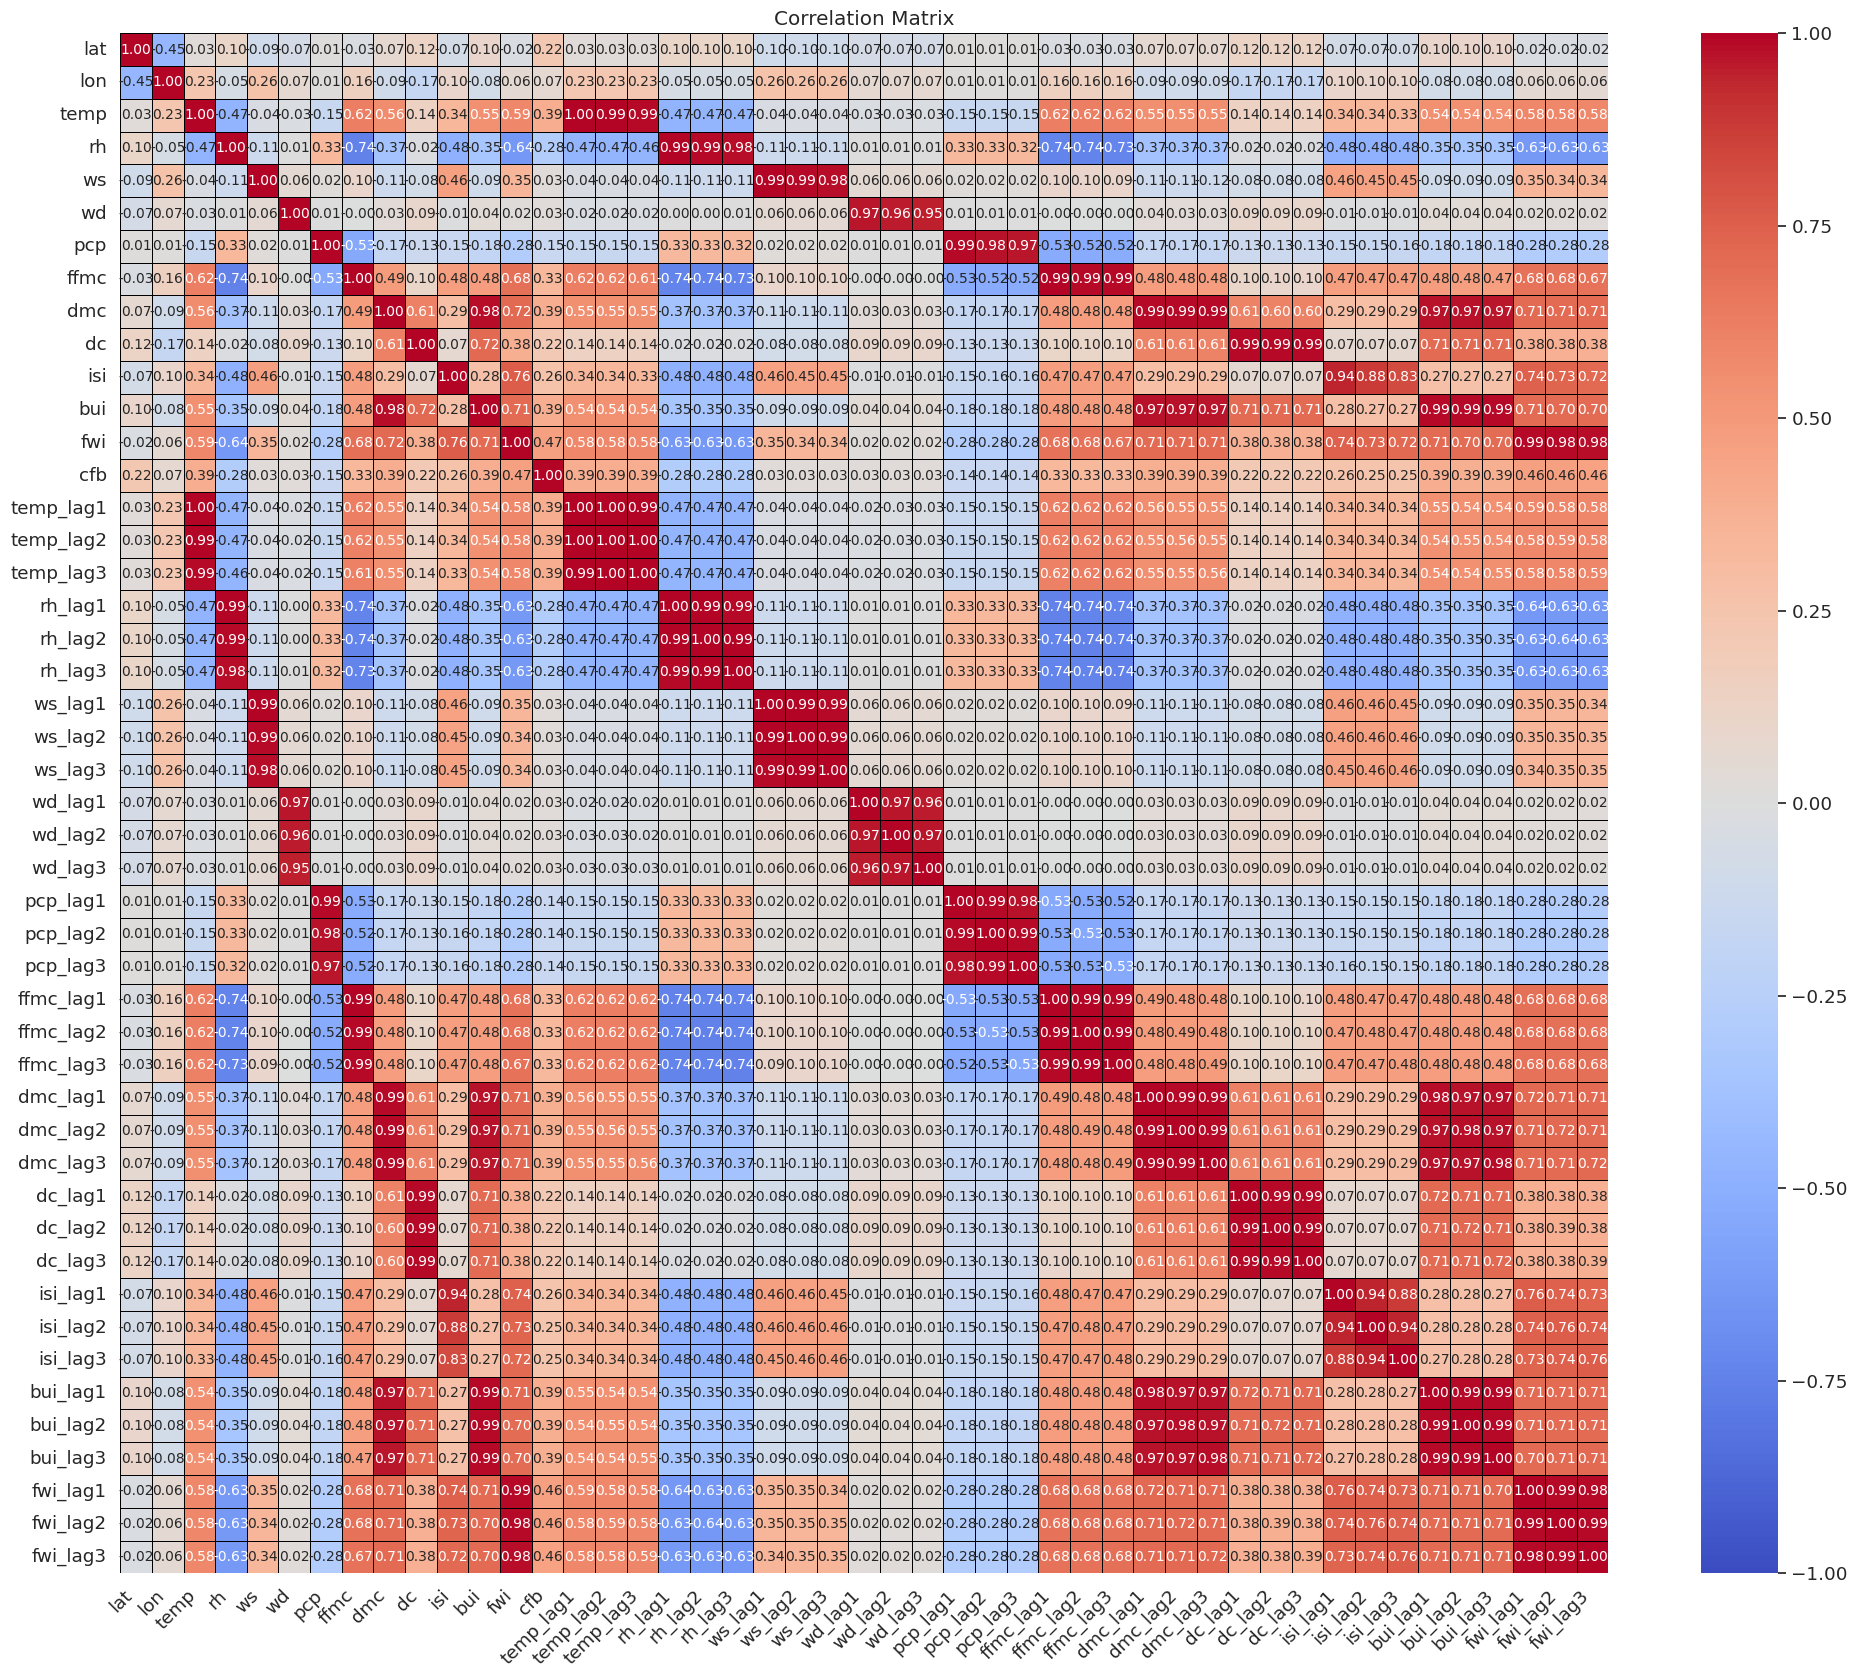

In [209]:
# Plot the heatmap

plt.figure(figsize=(24, 20))
sns.set(font_scale=1.2)  # Increase font scale for better readability
heatmap = sns.heatmap(filtered_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, linecolor='black', annot_kws={"size": 10})
heatmap.set_title('Correlation Matrix')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.show()

In [211]:
# Define the target variable
target = 'cfb'

# Define the features
features = expanded_gdf.drop(columns=[target, '_id', 'rep_date', 'source', 'sensor', 'satellite', 'agency', 'fuel', 'ecozone',
                                      'country', 'municipality', 'postalCode', 'freeformAddress', 'addressComponents', 'locality'])

In [212]:
# Use a subset of the data 
subset_size = 10000
X_train, X_test, y_train, y_test = train_test_split(features.head(subset_size), expanded_gdf[target].head(subset_size), test_size=0.2, random_state=42)

In [210]:
# Initialize the RandomForestRegressor with optimizations
rf = RandomForestRegressor(n_estimators=50, max_depth=10, n_jobs=-1, random_state=42)

In [213]:
# Fit the model
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=50, n_jobs=-1, random_state=42)

In [214]:
# Get feature importances
importances = rf.feature_importances_

In [216]:
# Create a DataFrame for visualizing feature importances
feature_importances = pd.DataFrame({'feature': features.columns, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)
feature_importances 

,feature,importance
17,hfi,8.034418e-01
23,tfc0,3.629599e-02
13,ros,3.512622e-02
20,elev,3.018161e-02
21,sfl,2.001636e-02
...,...,...
37,rh_lag6,8.445842e-06
33,rh_lag2,8.278034e-06
103,month,3.503709e-07
102,year,1.484854e-07


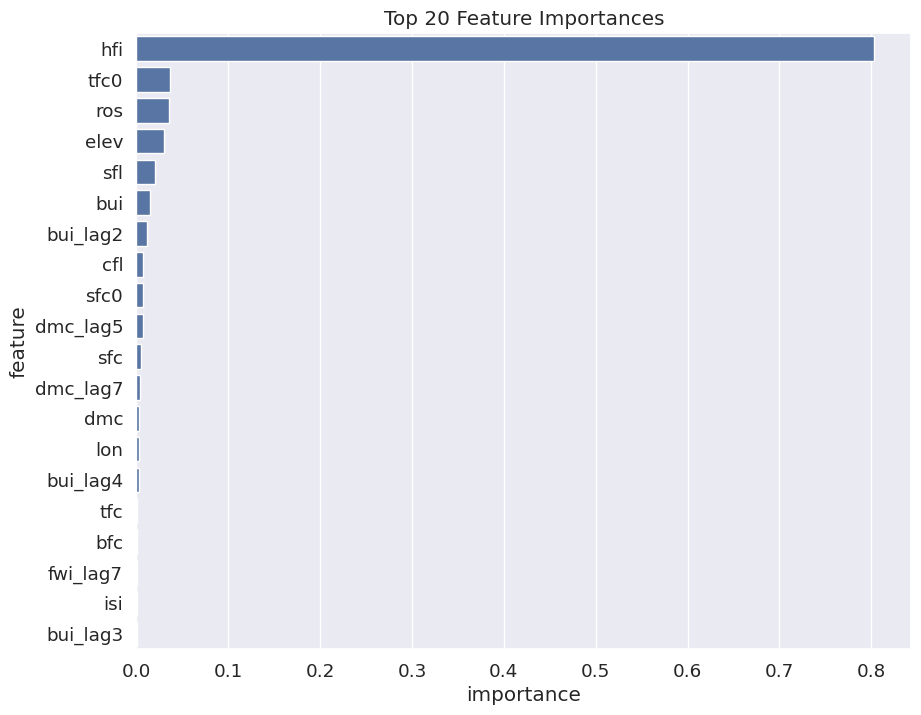

In [217]:
# Plot the top features
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importances.head(20))
plt.title('Top 20 Feature Importances')
plt.show()

In [215]:
# Select the top features
top_features = feature_importances.head(20)['feature'].tolist()

# Print the top features
print("Top features selected:")
print(top_features)

Top features selected:
['hfi', 'tfc0', 'ros', 'sfl', 'elev', 'bui_lag2', 'bui', 'cfl', 'sfc0', 'dmc_lag5', 'dmc', 'sfc', 'dmc_lag7', 'bui_lag4', 'bfc', 'tfc', 'isi', 'bui_lag5', 'fwi_lag7', 'lon']


In [218]:
final_columns = [
    'cfb', 'locality', 'rep_date', 'lat', 'lon', 'temp', 'wd', 'elev', 'rh', 'pcuring', 'day', 'ros', 
    'year', 'month', 'hfi', 'tfc0', 'sfl', 'bui_lag2', 'bui', 'cfl', 'sfc0', 'dmc_lag5', 'dmc', 'sfc', 
    'dmc_lag7', 'bui_lag4', 'bfc', 'tfc', 'isi', 'bui_lag5', 'fwi_lag7'
]

In [219]:
# Create the final DataFrame with selected columns
final_df = expanded_gdf[final_columns]

In [224]:
# Display the first few rows of the final DataFrame
final_df.head()

,cfb,locality,rep_date,lat,lon,temp,wd,elev,rh,pcuring,...,dmc_lag5,dmc,sfc,dmc_lag7,bui_lag4,bfc,tfc,isi,bui_lag5,fwi_lag7
0,0.0,100 Mile House,2021-01-09,51.627403,-121.285294,-0.926,328.0,917.0,78.0,94.0,...,1.331,1.331,0.07,1.331,2.53,2.180375,0.07,0.046,2.53,0.015
1,0.0,100 Mile House,2021-01-10,51.547768,-121.402448,-0.926,328.0,917.0,78.0,94.0,...,1.331,1.331,0.07,1.331,2.53,2.180375,0.07,0.046,2.53,0.015
2,0.0,100 Mile House,2021-01-11,51.547768,-121.402448,-0.926,328.0,917.0,78.0,94.0,...,1.331,1.331,0.07,1.331,2.53,2.180375,0.07,0.046,2.53,0.015
3,0.0,100 Mile House,2021-01-12,51.547768,-121.402448,-0.926,328.0,917.0,78.0,94.0,...,1.331,1.331,0.07,1.331,2.53,2.180375,0.07,0.046,2.53,0.015
4,0.0,100 Mile House,2021-01-13,51.547768,-121.402448,-0.926,328.0,917.0,78.0,94.0,...,1.331,1.331,0.07,1.331,2.53,2.180375,0.07,0.046,2.53,0.015


In [220]:
final_df.shape

(659376, 31)

In [226]:
final_df.columns

Index(['cfb', 'locality', 'rep_date', 'lat', 'lon', 'temp', 'wd', 'elev', 'rh',
       'pcuring', 'day', 'ros', 'year', 'month', 'hfi', 'tfc0', 'sfl',
       'bui_lag2', 'bui', 'cfl', 'sfc0', 'dmc_lag5', 'dmc', 'sfc', 'dmc_lag7',
       'bui_lag4', 'bfc', 'tfc', 'isi', 'bui_lag5', 'fwi_lag7'],
      dtype='object')

In [227]:
print(final_df.describe())

                 cfb                       rep_date            lat  \
count  659376.000000                         659376  659376.000000   
mean       17.818443  2021-10-26 11:48:50.028390656      53.970646   
min         0.000000            2020-03-20 00:00:00      42.079941   
25%         0.000000            2021-03-14 00:00:00      50.868142   
50%         0.000000            2021-09-14 00:00:00      53.182217   
75%         7.000000            2022-07-08 00:00:00      56.003780   
max       100.000000            2023-09-04 00:00:00      68.277000   
std        33.432983                            NaN       4.166246   

                 lon           temp             wd           elev  \
count  659376.000000  659376.000000  659376.000000  659376.000000   
mean     -109.822134      17.799317     197.640630     631.598078   
min      -140.989000     -17.797001       0.000000       1.000000   
25%      -120.044227      12.604000     133.000000     333.000000   
50%      -110.997566    

In [225]:
print(final_df.isnull().sum())

cfb         0
locality    0
rep_date    0
lat         0
lon         0
temp        0
wd          0
elev        0
rh          0
pcuring     0
day         0
ros         0
year        0
month       0
hfi         0
tfc0        0
sfl         0
bui_lag2    0
bui         0
cfl         0
sfc0        0
dmc_lag5    0
dmc         0
sfc         0
dmc_lag7    0
bui_lag4    0
bfc         0
tfc         0
isi         0
bui_lag5    0
fwi_lag7    0
dtype: int64


In [238]:
def delete_data_in_collection(collection_name):
    try:
        # Create a MongoDB client
        client = MongoClient(mongo_uri)
        
        # Connect to the database
        db = client[db_name]
        
        # Delete all documents in the collection
        collection = db[collection_name]
        collection.delete_many({})
        print(f"Deleted all documents in the collection '{collection_name}'.")

    except ConnectionFailure as e:
        print(f"Could not connect to MongoDB: {e}")
    except Exception as e:
        print(f"An error occurred: {e}")
    finally:
        # Close the connection
        client.close()
        print("Connection closed.")

In [239]:
from db_utils import insert_df_only_to_mongodb

# Specify the final DataFrame
final_df = final_df  

# Collection name
collection_name = 'wildfire_collection_feature_engineering_final'


In [240]:
# Delete existing data
delete_data_in_collection(collection_name)

INFO:pymongo.client:You appear to be connected to a CosmosDB cluster. For more information regarding feature compatibility and support please visit https://www.mongodb.com/supportability/cosmosdb


Deleted all documents in the collection 'wildfire_collection_feature_engineering_final'.
Connection closed.


In [241]:
# Insert the final DataFrame
insert_df_only_to_mongodb(final_df, collection_name)

INFO:pymongo.client:You appear to be connected to a CosmosDB cluster. For more information regarding feature compatibility and support please visit https://www.mongodb.com/supportability/cosmosdb


Connection closed.


In [242]:
def count_documents_in_collection(collection_name):
    try:
        # Create a MongoDB client
        client = MongoClient(mongo_uri)
        
        # Connect to the database
        db = client[db_name]
        
        # Count documents in the collection
        collection = db[collection_name]
        count = collection.count_documents({})
        print(f"The collection '{collection_name}' contains {count} documents.")
        return count

    except ConnectionFailure as e:
        print(f"Could not connect to MongoDB: {e}")
    except Exception as e:
        print(f"An error occurred: {e}")
    finally:
        # Close the connection
        client.close()
        print("Connection closed.")

In [243]:
# Verify if the data is complete after insertion
num_rows_in_df = len(final_df)
num_docs_in_collection = count_documents_in_collection(collection_name)

# Compare the number of rows and documents
if num_rows_in_df == num_docs_in_collection:
    print("Data insertion is complete and verified.")
else:
    print("Data insertion verification failed.")
    print(f"Number of rows in DataFrame: {num_rows_in_df}")
    print(f"Number of documents in collection: {num_docs_in_collection}")

INFO:pymongo.client:You appear to be connected to a CosmosDB cluster. For more information regarding feature compatibility and support please visit https://www.mongodb.com/supportability/cosmosdb


The collection 'wildfire_collection_feature_engineering_final' contains 659376 documents.
Connection closed.
Data insertion is complete and verified.
